<a href="https://colab.research.google.com/github/11jolek11/panda_sklearn/blob/main/panda_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [130]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [131]:
df = sns.load_dataset('mpg').dropna()
cechy = ['horsepower', 'mpg', 'cylinders']
# df = df[cechy]     # ładniej za pomocą funkcji pipe
df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
86,14.0,8,304.0,150.0,3672,11.5,73,usa,amc matador
320,37.0,4,119.0,92.0,2434,15.0,80,japan,datsun 510 hatchback
99,18.0,6,232.0,100.0,2945,16.0,73,usa,amc hornet
42,12.0,8,383.0,180.0,4955,11.5,71,usa,dodge monaco (sw)
313,28.0,4,151.0,90.0,2678,16.5,80,usa,chevrolet citation


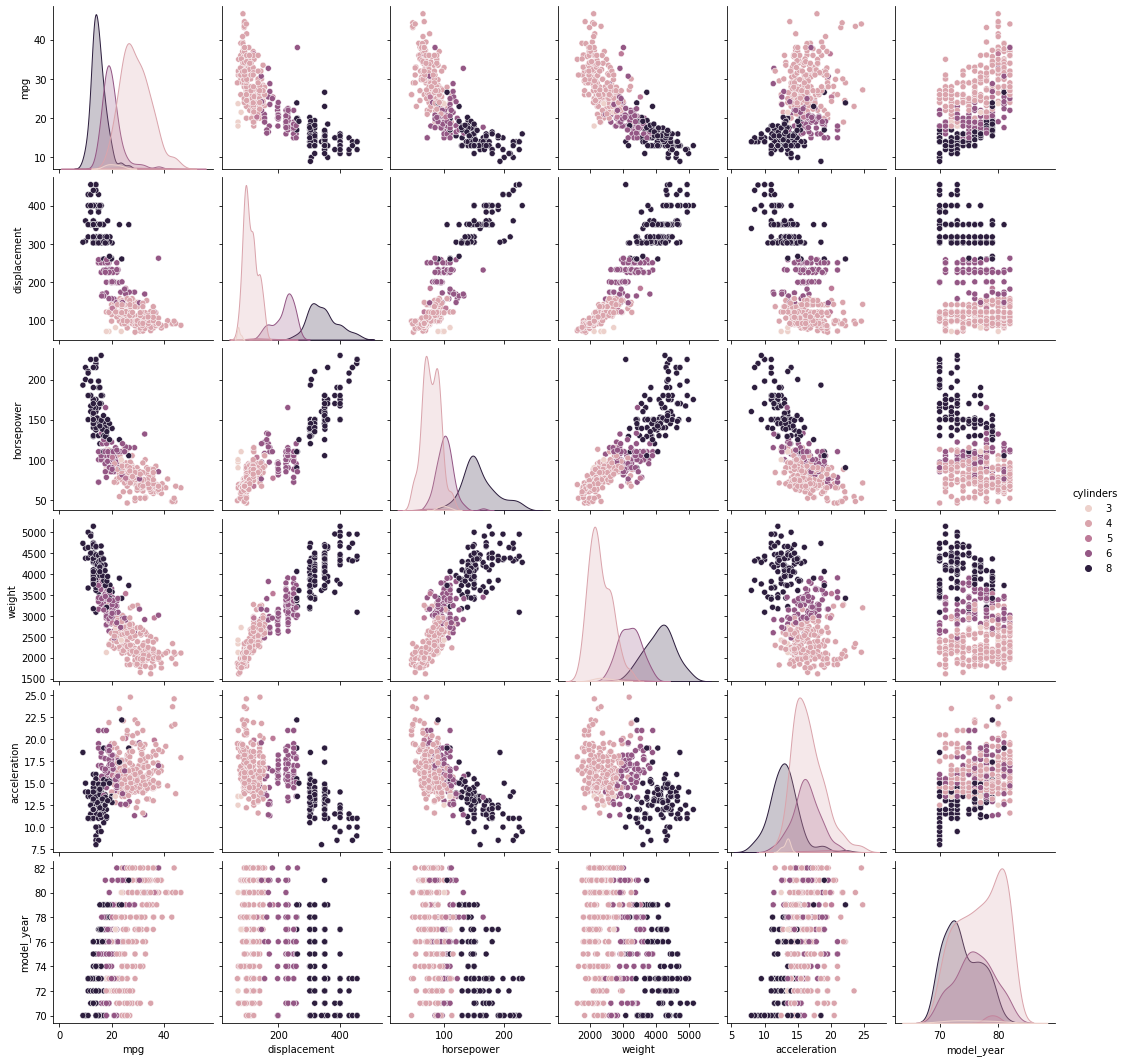

In [132]:
sns.pairplot(data = df, hue='cylinders')

In [133]:
x_data = df['horsepower'].to_numpy()
y_data = df['mpg'].to_numpy()

In [134]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(x_data.reshape(-1,1), y_data.reshape(-1,1))

LinearRegression()

In [135]:
a, b = linreg.coef_, linreg.intercept_
print(f'a = {a}\nb={b}')

a = [[-0.15784473]]
b=[39.93586102]


In [136]:
x_test = np.linspace(x_data.min(), x_data.max(), num=300)
y_pred = linreg.predict(x_test.reshape(-1,1))

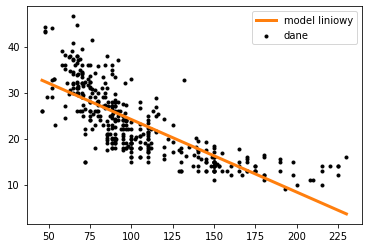

In [137]:
# from sklearn.preprocessing import StandardScaler, MinMaxScaler fit, transform
plt.scatter(x_data,y_data, color='black', marker='.', label='dane')
plt.plot(x_test, y_pred, color='tab:orange', linewidth=3, label='model liniowy')
plt.legend()
#plt.axis('square')
plt.show()

Ocenić model
$$
Q(\mathbf{a}) = \sqrt{\frac{1}{N}\sum_{i=1}^N (y_i - \overline{y}_i)^2}
$$

To na dole jest źle, bo naszą intencją jest ocena jakości modelu na danych nowych

In [138]:
x_data
y_pred = linreg.predict(x_data.reshape(-1,1))

In [139]:
print(f'MSE = {np.sqrt(((y_data - y_pred)**2).mean()):0.4f}')

# co jest dobrym modelem odniesienia dla oceny jakości modelu liniowego?

MSE = 9.8784


In [140]:
from sklearn.metrics import mean_squared_error
print(f'MSE = {mean_squared_error(y_data, y_pred):0.4f}')
print(f'MSE_nasze = {np.sqrt(((y_data - y_pred)**2).mean()):0.4f}')

MSE = 23.9437
MSE_nasze = 9.8784


In [141]:
x_data.size

392

In [142]:
y_true = np.array([3, -0.5, 2, 7])
y_pred = np.array([2.5, 0.0, 2, 8])
mean_squared_error(y_true, y_pred, squared=False)

0.6123724356957945

In [143]:
np.sqrt(((y_true-y_pred)**2).mean())

0.6123724356957945

A teraz jest lepiej, bo "zasymulujemy" sobie pojawienie się nowych danych

In [144]:
x_data = df['horsepower'].to_numpy()
y_data = df['mpg'].to_numpy()

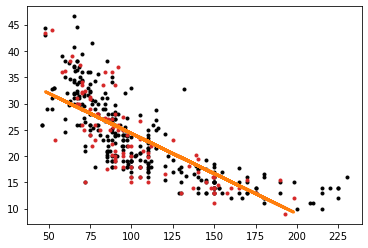

MSE_nasze test = 9.5078
MSE_nasze train = 9.8425


In [145]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data)

linreg = LinearRegression().fit(x_train.reshape(-1,1),y_train.reshape(-1,1))
y_test_pred = linreg.predict(x_test.reshape(-1,1))
y_train_pred = linreg.predict(x_train.reshape(-1,1))

plt.scatter(x_train, y_train, color='black', marker='.', label='dane do uczenia')
plt.scatter(x_test, y_test, color='tab:red', marker='.', label='dane do testowania')
plt.plot(x_test, y_test_pred, color='tab:orange', linewidth=3, label='model liniowy')
plt.show()

lin_test = np.sqrt(((y_test - y_test_pred)**2).mean())
lin_train = np.sqrt(((y_train - y_train_pred)**2).mean())
print(f'MSE_nasze test = {lin_test:0.4f}')
print(f'MSE_nasze train = {lin_train:0.4f}')

Zadanie domowe: wytrenuj inny model, np. maszynę wektorów wspierających ([SVR](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html)), drzewo decyzyjne ([DecisionTreeRegresor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)) itp.

Wkomponuj nowy kod do powyższego kodu.

Zastanów się, który ze zbadanych modeli byłby najlepszy, posługując się wizualną oceną predykcji modelu oraz wartościami błędów średniokwadratowych.

In [146]:
from sklearn.svm import SVR

clf = SVR(kernel='linear')
clf.fit(x_train.reshape(-1,1), y_train.reshape(-1,1))

y_prediction = clf.predict(x_test.reshape(-1, 1))
y_train_prediction = clf.predict(x_train.reshape(-1, 1))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [147]:
svr_test = np.sqrt(((y_test - y_prediction)**2).mean())
print(f'MSE_nasze test = {svr_test:0.4f}')

MSE_nasze test = 5.0033


In [148]:
# y_prediction = clf.predict(x_test.reshape(-1, 1))
# print(f'MSE_nasze train = {np.sqrt(((y_train - y_train_prediction)**2).mean()):0.4f}')
svr_train = np.sqrt(((y_train - y_train_prediction)**2).mean())
print(f'MSE_nasze train = {svr_train:0.4f}')

MSE_nasze train = 4.8624


In [149]:
clf.n_support_
support_vectores = clf.support_vectors_

In [150]:
prediction_ofX = clf.predict(x_train.reshape(-1, 1))

In [151]:
# print(support_vectores.flatten())

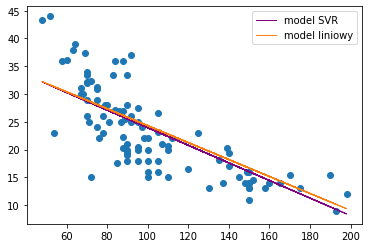

In [152]:
plt.scatter(x_test, y_test)
plt.plot(x_test,y_prediction, color='purple',linewidth=1, label='model SVR')
plt.plot(x_test, y_test_pred, color='tab:orange', linewidth=1, label='model liniowy')
plt.legend()
plt.show()

In [153]:
print("SVR")
print(f'MSE_nasze test = {svr_test:0.4f}')
print(f'MSE_nasze train = {svr_train:0.4f}')
print("Linear Regression model")
print(f'MSE_nasze test = {lin_test:0.4f}')
print(f'MSE_nasze train = {lin_train:0.4f}')

SVR
MSE_nasze test = 5.0033
MSE_nasze train = 4.8624
Linear Regression model
MSE_nasze test = 9.5078
MSE_nasze train = 9.8425
